In [32]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline

NameError: name 'nltk' is not defined

In [15]:
iron_man = pd.read_csv('iron_man.csv',index_col=0)

In [16]:
iron_man.head()

,productId,userId,score,summary,review
517024,B001FZ9AAU,A10RMS4T6P76M4,5.0,"Excellent, action packed, and fun!",I really enjoyed this movie. Robert Downey Jr...
517025,B001FZ9AAU,A2JEONEOLE4FD2,5.0,Ironman proves there are heroes beyond Spidey...,This is a great entertainer done very well. Bu...
517026,B001FZ9AAU,A3LH77PBDFEO3F,5.0,Guilty Pleasue of a movie!,"I have never been a comic book guy, and super ..."
517027,B001FZ9AAU,A6BRC4D9NZJFK,5.0,highly recommended,how can you not love this movie<br />excellent...
517028,B001FZ9AAU,A2C62X7R904NKM,4.0,Robert Downey Jr. actually does it as a super...,I think that movie makers have to wait till th...


In [17]:
iron_man.shape

(8322, 5)

In [24]:
iron_man['is_duplicate'] = iron_man.review.duplicated(keep='first')

In [25]:
iron_man.head()

,productId,userId,score,summary,review,is_duplicate
517024,B001FZ9AAU,A10RMS4T6P76M4,5.0,"Excellent, action packed, and fun!",I really enjoyed this movie. Robert Downey Jr...,False
517025,B001FZ9AAU,A2JEONEOLE4FD2,5.0,Ironman proves there are heroes beyond Spidey...,This is a great entertainer done very well. Bu...,False
517026,B001FZ9AAU,A3LH77PBDFEO3F,5.0,Guilty Pleasue of a movie!,"I have never been a comic book guy, and super ...",False
517027,B001FZ9AAU,A6BRC4D9NZJFK,5.0,highly recommended,how can you not love this movie<br />excellent...,False
517028,B001FZ9AAU,A2C62X7R904NKM,4.0,Robert Downey Jr. actually does it as a super...,I think that movie makers have to wait till th...,False


In [26]:
iron_man.is_duplicate.value_counts()

True     7398
False     924
Name: is_duplicate, dtype: int64

In [27]:
iron_man = iron_man[iron_man.is_duplicate == False]

In [28]:
iron_man.shape

(924, 6)

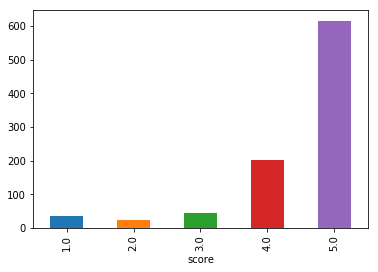

In [30]:
iron_man.groupby('score').review.count().plot.bar(ylim=0)
plt.show()


In [34]:
import nltk
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
iron_man['cleaned'] = iron_man['review'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mm40743/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
iron_man.head()

,productId,userId,score,summary,review,is_duplicate,cleaned
517024,B001FZ9AAU,A10RMS4T6P76M4,5.0,"Excellent, action packed, and fun!",I really enjoyed this movie. Robert Downey Jr...,False,i realli enjoy movi robert downey jr realli su...
517025,B001FZ9AAU,A2JEONEOLE4FD2,5.0,Ironman proves there are heroes beyond Spidey...,This is a great entertainer done very well. Bu...,False,thi great entertain done well but ironman comp...
517026,B001FZ9AAU,A3LH77PBDFEO3F,5.0,Guilty Pleasue of a movie!,"I have never been a comic book guy, and super ...",False,i never comic book guy super hero movi seldom ...
517027,B001FZ9AAU,A6BRC4D9NZJFK,5.0,highly recommended,how can you not love this movie<br />excellent...,False,love movi br excel item arriv time perfect condit
517028,B001FZ9AAU,A2C62X7R904NKM,4.0,Robert Downey Jr. actually does it as a super...,I think that movie makers have to wait till th...,False,i think movi maker wait till technolog produc ...


In [36]:
iron_man[0:2]

,productId,userId,score,summary,review,is_duplicate,cleaned
517024,B001FZ9AAU,A10RMS4T6P76M4,5.0,"Excellent, action packed, and fun!",I really enjoyed this movie. Robert Downey Jr...,False,i realli enjoy movi robert downey jr realli su...
517025,B001FZ9AAU,A2JEONEOLE4FD2,5.0,Ironman proves there are heroes beyond Spidey...,This is a great entertainer done very well. Bu...,False,thi great entertain done well but ironman comp...


In [37]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(iron_man['cleaned']).toarray()
final_features.shape

(924, 5554)

In [57]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = iron_man['cleaned']
Y = iron_man['score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [58]:
X_train.head()

517106    iron man charact i never histori comic book fa...
517711    just i need hero came one nice you better quit...
517834    as kid i bought iron man comic dad would dismi...
517865    blu ray plu one best super hero movi made make...
517788    for rememb buy spiderman cent may made jump ce...
Name: cleaned, dtype: object

In [59]:
X_test.head()

517716    jon favreau deliv awesom movi a good comic boo...
517915    disc play ps i submit return amazon realli sim...
517268    robert downey jr talent actor even though fun ...
517418    a great movi beauti render blu ray the extra m...
517806    i know i late get movi offer special deal thor...
Name: cleaned, dtype: object

In [60]:
y_train.head()

517106    4.0
517711    5.0
517834    4.0
517865    5.0
517788    5.0
Name: score, dtype: float64

In [61]:
y_test.head()

517716    5.0
517915    1.0
517268    5.0
517418    5.0
517806    5.0
Name: score, dtype: float64

In [62]:
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

In [63]:
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
ytest[:50]

array([5., 1., 5., 5., 5., 5., 5., 4., 4., 4., 4., 5., 5., 5., 5., 4., 5.,
       5., 5., 5., 3., 3., 5., 4., 5., 4., 4., 1., 4., 4., 5., 3., 5., 5.,
       3., 1., 4., 4., 5., 5., 3., 5., 4., 5., 5., 5., 4., 5., 4., 5.])

In [65]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      0.22      0.36         9
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00        12
         4.0       0.33      0.14      0.20        56
         5.0       0.66      0.91      0.76       148

   micro avg       0.63      0.63      0.63       231
   macro avg       0.40      0.26      0.27       231
weighted avg       0.54      0.63      0.55       231



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
print(confusion_matrix(ytest, model.predict(X_test)))

[[  2   0   0   0   7]
 [  0   0   0   1   5]
 [  0   0   0   2  10]
 [  0   0   0   8  48]
 [  0   0   0  13 135]]
